## Load Data

In [62]:
import os
import glob
import pandas as pd
from tqdm.auto import tqdm
import time
from matplotlib import pyplot as plt

In [34]:

# Test out the read in helper function
def get_subject_action(sensor, full_path):
    index = full_path.find(sensor)
    index += len(sensor)
    subject = int(full_path[index+1:index+3])
    action = int(full_path[index+4:index+6])
    if action == 4:
        if full_path.find(f"{sensor}_1") > 0:
            action = '4-1'
        else:
            action = '4-2'
        
    return (subject, str(action))

actions = ['1', '2', '3', '4-1', '4-2', '5', '6', '7']

sensor_list = ['act', 'acw', 'dc', 'pm']

for sensor in sensor_list:
    for sensor_dir in glob.iglob('.\\data\\' + sensor ):
        print(f"On {sensor}")
        for subject_id, subject_dir in enumerate(glob.iglob(f"{sensor_dir}\\*")):
            for action_id, file in enumerate(os.listdir(subject_dir)):
                full_path = f"{subject_dir}\\{file}"
                #print(full_path, get_subject_action(sensor, full_path))
                
test_str = '.\\data\\act\\01\\01_act_1.csv'
get_subject_action('act', test_str)

On act
On acw
On dc
On pm


(1, '1')

In [35]:
%%time

total_data = {
    'act': None,
    'acw': None,
    'dc': None,
    'pm': None,
}


headers = {
    'act': ['times', 'X', 'Y', 'Z'],
    'acw': ['times', 'X', 'Y', 'Z'],
    'dc': ['times'],
    'pm': ['times']
}
for i in range(1,513):
    headers['pm'].append(f"sensor_{i}")
for i in range(1,193):
    headers['dc'].append(f"sensor_{i}")
#sensor_list = ['dc']

# there are 956 files in our dataset
i = 0

pbar = tqdm(desc="load data", total=956)
for sensor in sensor_list:
    for sensor_dir in glob.iglob('.\\data\\' + sensor ):
        #print(f"On {sensor}")
        for subject_id, subject_dir in enumerate(glob.iglob(f"{sensor_dir}\\*")):
            for action_id, file in enumerate(os.listdir(subject_dir)):
                full_path = f"{subject_dir}\\{file}"
                df_tmp = pd.read_csv(full_path, names=headers[sensor])
                i+=1
                pbar.update(1)
                subject, action = get_subject_action(sensor, full_path)
                # add one to make it match the given format
                df_tmp['subject'] = subject
                df_tmp['action'] = action
                if total_data[sensor] is None:
                    total_data[sensor] = df_tmp
                else:
                    total_data[sensor] = pd.concat([total_data[sensor], df_tmp])

load data:   0%|          | 0/956 [00:00<?, ?it/s]

Wall time: 1min 8s


In [36]:
total_data['pm'].head()

,times,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_505,sensor_506,sensor_507,sensor_508,sensor_509,sensor_510,sensor_511,sensor_512,subject,action
0,2018-11-08 11:34:51.468000,20.0,3.0,2.0,0.0,0.0,0.0,72.0,1493.0,1949.0,...,68.0,77.0,55.0,193.0,387.0,331.0,125.0,6.0,1,1
1,2018-11-08 11:34:51.535000,20.0,3.0,2.0,0.0,0.0,0.0,72.0,1493.0,1949.0,...,58.0,78.0,53.0,192.0,388.0,330.0,123.0,6.0,1,1
2,2018-11-08 11:34:51.602000,20.0,3.0,2.0,0.0,0.0,0.0,72.0,1493.0,1949.0,...,64.0,78.0,53.0,195.0,390.0,330.0,119.0,7.0,1,1
3,2018-11-08 11:34:51.669000,20.0,3.0,2.0,0.0,0.0,0.0,72.0,1493.0,1949.0,...,66.0,79.0,55.0,196.0,391.0,324.0,106.0,5.0,1,1
4,2018-11-08 11:34:51.737000,20.0,3.0,2.0,0.0,0.0,0.0,72.0,1493.0,1949.0,...,64.0,79.0,55.0,194.0,391.0,321.0,114.0,6.0,1,1


In [37]:
total_data['act'].head()

,times,X,Y,Z,subject,action
0,2018-11-08 11:34:51.474000,-0.546875,-0.828125,-0.109375,1,1
1,2018-11-08 11:34:51.484000,-0.531250,-0.828125,-0.109375,1,1
2,2018-11-08 11:34:51.494000,-0.531250,-0.828125,-0.109375,1,1
3,2018-11-08 11:34:51.504000,-0.531250,-0.843750,-0.109375,1,1
4,2018-11-08 11:34:51.513000,-0.515625,-0.843750,-0.109375,1,1


In [38]:
df_sub = total_data['acw'][total_data['acw'].subject == 1]
df_sub[df_sub.action == '1']

,times,X,Y,Z,subject,action
0,2018-11-08 11:34:51.474000,0.125000,-0.046875,0.90625,1,1
1,2018-11-08 11:34:51.485000,0.109375,-0.062500,0.90625,1,1
2,2018-11-08 11:34:51.495000,0.109375,-0.062500,0.90625,1,1
3,2018-11-08 11:34:51.505000,0.125000,-0.062500,0.90625,1,1
4,2018-11-08 11:34:51.516000,0.125000,-0.062500,0.90625,1,1
...,...,...,...,...,...,...
6269,2018-11-08 11:35:56.373000,0.093750,-0.265625,0.87500,1,1
6270,2018-11-08 11:35:56.383000,0.093750,-0.281250,0.87500,1,1
6271,2018-11-08 11:35:56.394000,0.093750,-0.265625,0.87500,1,1
6272,2018-11-08 11:35:56.404000,0.093750,-0.265625,0.87500,1,1


In [232]:
total_data['pm']['sensor_7'].unique()

array([  72.,    0.,    2., ..., 1396., 1401., 1414.])

In [40]:
for key in total_data.keys():
    if total_data[key] is not None:
        print(key)
        print(total_data[key]['action'].unique())
        print(total_data[key]['subject'].unique())
        for header in headers[key]:
            if(total_data[key][header].isnull().values.any()):
                print(f"{header} has Null data")
        print(total_data[key].info())
        print('-------------------------------------------------------------------------')

act
['1' '2' '3' '4-1' '4-2' '5' '6' '7']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400856 entries, 0 to 6418
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   times    1400856 non-null  object 
 1   X        1400856 non-null  float64
 2   Y        1400856 non-null  float64
 3   Z        1400856 non-null  float64
 4   subject  1400856 non-null  int64  
 5   action   1400856 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 74.8+ MB
None
-------------------------------------------------------------------------
acw
['1' '2' '3' '4-1' '4-2' '5' '6' '7']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313695 entries, 0 to 6013
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype  
---  -----

# Start with the dc data
## example pressure maps


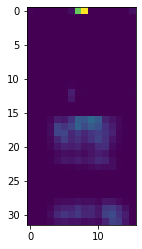

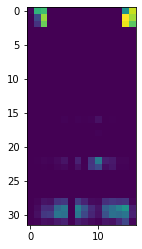

In [66]:
def getPressureMap(features):
    mat = []
    for x in range(1,33):
        row = []
        for y in range(1,17):
            row.append(features['sensor_' + str((x-1) * 16 + y)])
        mat.append(row)
    return mat

plt.imshow(getPressureMap(total_data['pm'].iloc[0]), interpolation='nearest')
plt.show()



In [107]:
total_data['pm'].iloc[7241].subject

1

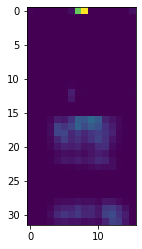

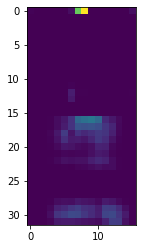

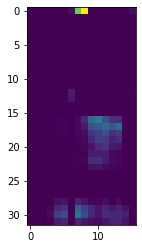

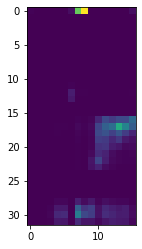

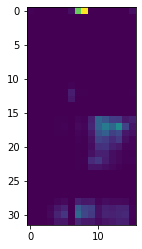

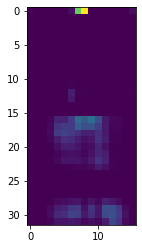

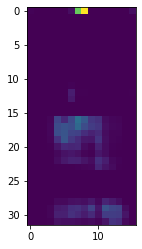

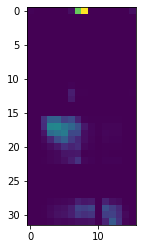

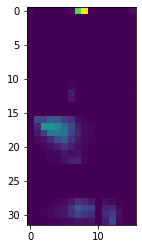

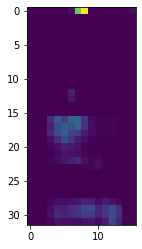

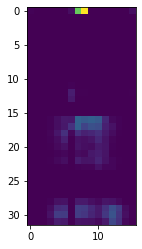

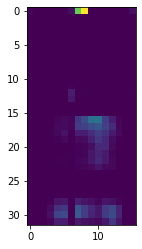

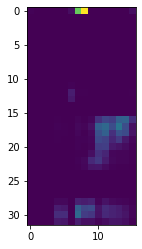

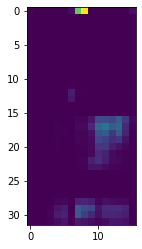

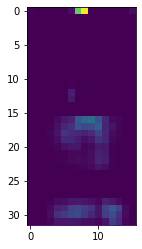

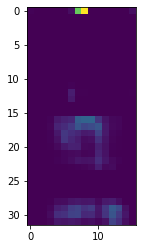

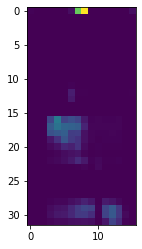

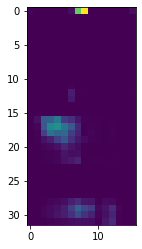

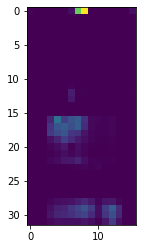

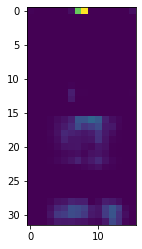

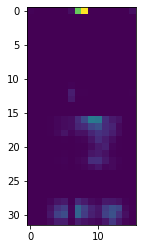

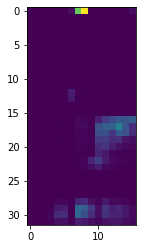

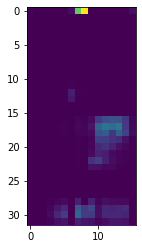

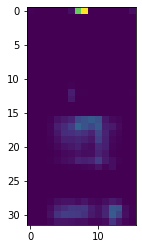

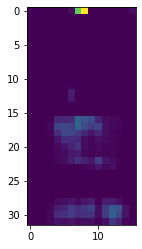

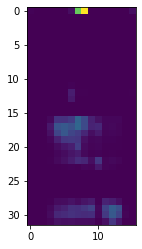

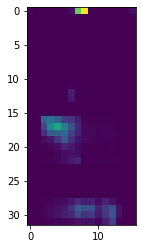

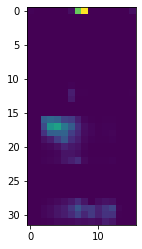

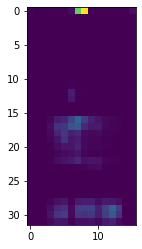

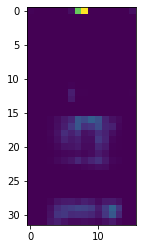

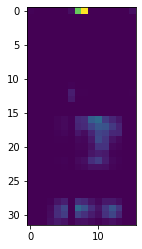

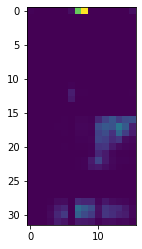

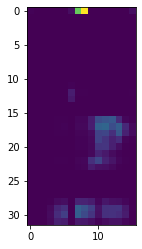

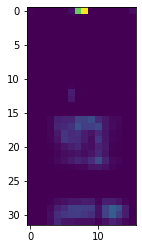

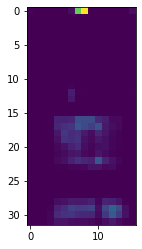

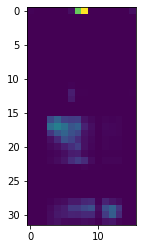

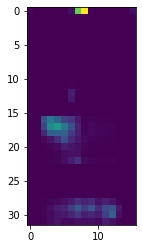

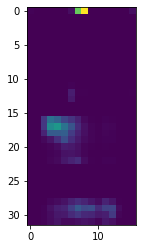

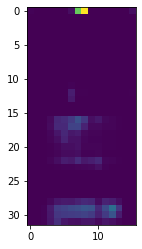

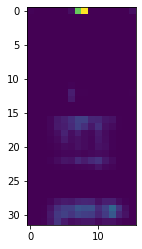

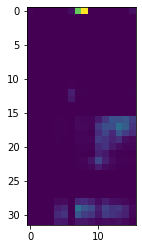

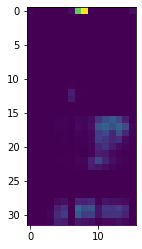

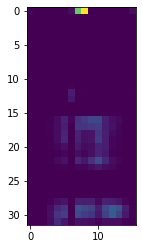

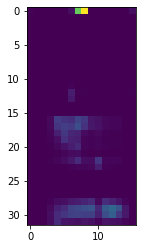

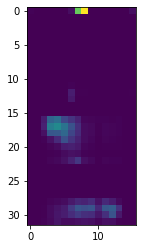

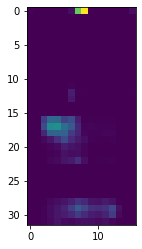

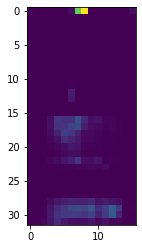

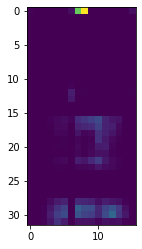

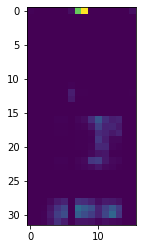

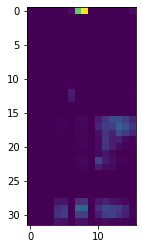

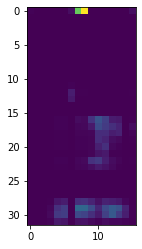

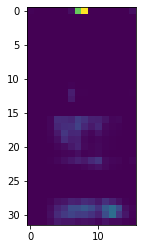

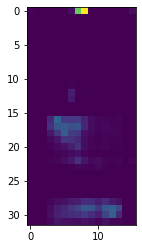

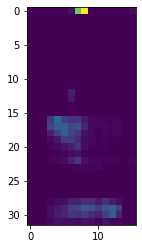

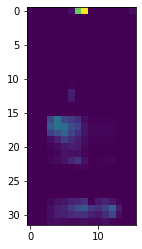

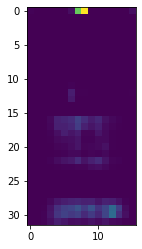

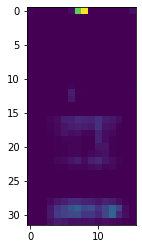

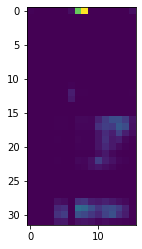

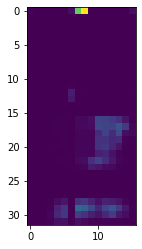

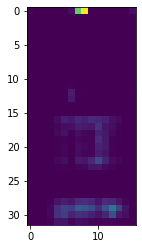

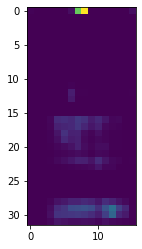

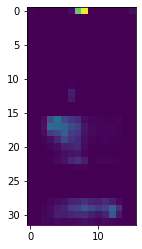

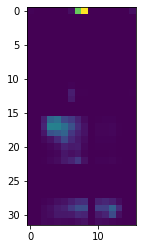

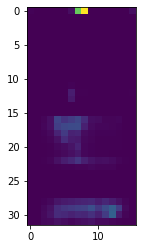

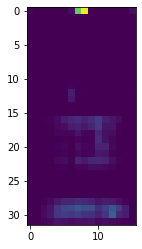

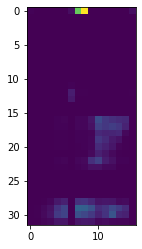

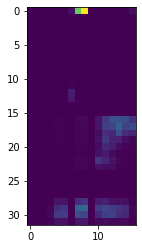

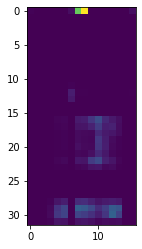

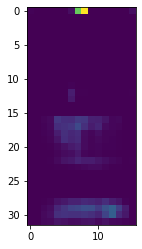

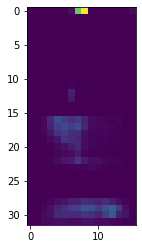

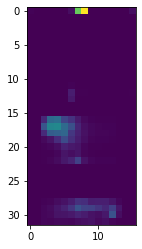

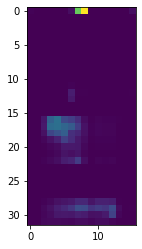

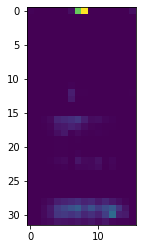

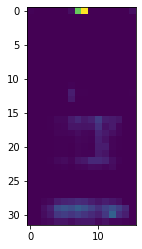

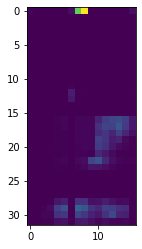

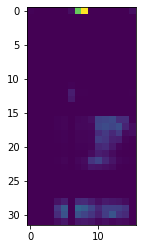

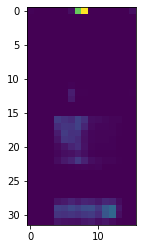

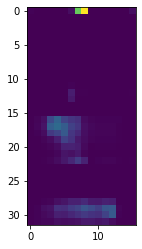

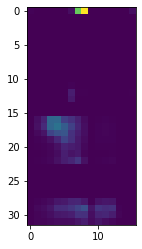

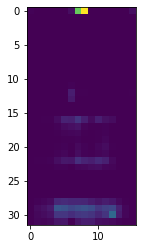

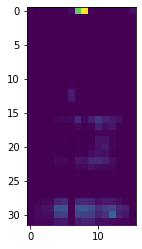

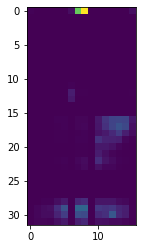

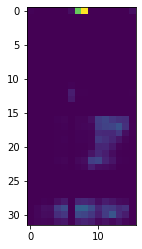

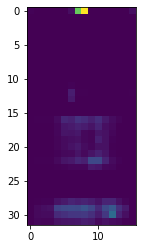

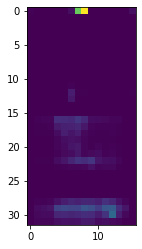

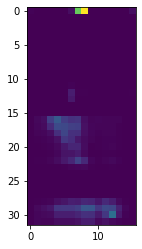

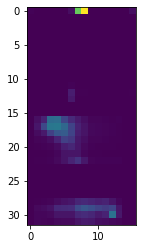

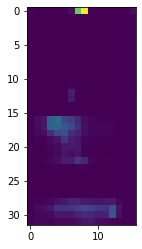

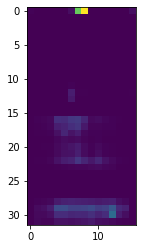

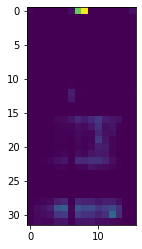

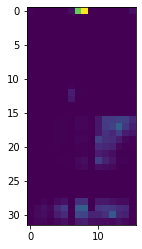

In [227]:
from matplotlib.pyplot import figure
subject_1_action_1 = total_data['pm'][total_data['pm']['subject'] == 30]
subject_1_action_1 = subject_1_action_1[subject_1_action_1['action'] == '1']
subject_1_action_1
index = 0
plots_row= 0
plots_column = 0
#fig, ax = plt.subplots(17,6,figsize=(16,9),gridspec_kw={'height_ratios': [2, 2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,]})
while index < len(subject_1_action_1):
    plt.imshow(getPressureMap(total_data['pm'].iloc[index]), interpolation='nearest')
    plt.show()
    index += 10
    plots_column += 1
    if plots_column == 6:
        plots_row += 1
        plots_column = 0

,times,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_505,sensor_506,sensor_507,sensor_508,sensor_509,sensor_510,sensor_511,sensor_512,subject,action
0,2018-11-08 11:34:51.468000,20.0,3.0,2.0,0.0,0.0,0.0,72.0,1493.0,1949.0,...,68.0,77.0,55.0,193.0,387.0,331.0,125.0,6.0,1,1
1,2018-11-08 11:34:51.535000,20.0,3.0,2.0,0.0,0.0,0.0,72.0,1493.0,1949.0,...,58.0,78.0,53.0,192.0,388.0,330.0,123.0,6.0,1,1
2,2018-11-08 11:34:51.602000,20.0,3.0,2.0,0.0,0.0,0.0,72.0,1493.0,1949.0,...,64.0,78.0,53.0,195.0,390.0,330.0,119.0,7.0,1,1
3,2018-11-08 11:34:51.669000,20.0,3.0,2.0,0.0,0.0,0.0,72.0,1493.0,1949.0,...,66.0,79.0,55.0,196.0,391.0,324.0,106.0,5.0,1,1
4,2018-11-08 11:34:51.737000,20.0,3.0,2.0,0.0,0.0,0.0,72.0,1493.0,1949.0,...,64.0,79.0,55.0,194.0,391.0,321.0,114.0,6.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,2018-11-08 11:35:56.149000,20.0,3.0,2.0,0.0,0.0,0.0,72.0,1493.0,1949.0,...,112.0,64.0,64.0,43.0,30.0,17.0,3.0,0.0,1,1
963,2018-11-08 11:35:56.216000,20.0,3.0,2.0,0.0,0.0,0.0,72.0,1493.0,1949.0,...,107.0,65.0,60.0,41.0,31.0,16.0,0.0,0.0,1,1
964,2018-11-08 11:35:56.282000,20.0,3.0,2.0,0.0,0.0,0.0,72.0,1493.0,1949.0,...,105.0,70.0,64.0,47.0,32.0,15.0,2.0,0.0,1,1
965,2018-11-08 11:35:56.351000,20.0,3.0,2.0,0.0,0.0,0.0,72.0,1493.0,1949.0,...,104.0,67.0,62.0,47.0,34.0,14.0,0.0,0.0,1,1


In [187]:
def ConvluveImage(features):
    np_array = np.copy(getPressureMap(features))
    size_x = np_array.shape[0]
    size_y = np_array.shape[0]
    filter = [[0,1,0],[1,1,1][0,1,0]]
    weight = 1
def PoolImage(features):
    np_array = np.copy(getPressureMap(features))
    size_x = np_array.shape[0]
    size_y = np_array.shape[0]
    filter = [[0,1,0],[1,1,1][0,1,0]]
    weight = 1

# Next the Depth Camera


In [190]:
total_data['dc'].head()

,times,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_185,sensor_186,sensor_187,sensor_188,sensor_189,sensor_190,sensor_191,sensor_192,subject,action
0,2018-11-08 11:34:51.538000,0.4583,0.9214,0.9221,0.9167,0.9136,0.9136,0.9106,0.9075,0.9052,...,0.9429,0.6804,0.936,0.936,0.9360,0.9329,0.926,0.9279,1,1
1,2018-11-08 11:34:51.632000,0.4583,0.9214,0.9214,0.9167,0.9144,0.9136,0.9106,0.9075,0.9060,...,0.9429,0.9150,0.936,0.936,0.9360,0.9352,0.926,0.9279,1,1
2,2018-11-08 11:34:51.804000,0.4583,0.9214,0.9214,0.9167,0.9136,0.9121,0.9121,0.9075,0.9060,...,0.9429,0.9165,0.936,0.936,0.9360,0.9329,0.926,0.9260,1,1
3,2018-11-08 11:34:51.977000,0.4591,0.9214,0.9206,0.9167,0.9136,0.9128,0.9106,0.9075,0.9060,...,0.9429,0.9150,0.936,0.936,0.9345,0.9329,0.926,0.9260,1,1
4,2018-11-08 11:34:52.133000,0.4591,0.9214,0.9198,0.9167,0.9144,0.9136,0.9106,0.9075,0.9060,...,0.9429,0.6804,0.936,0.936,0.9360,0.9329,0.926,0.9260,1,1


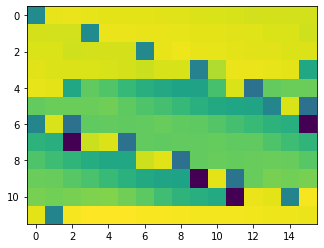

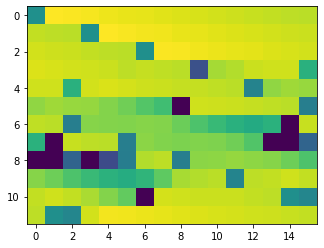

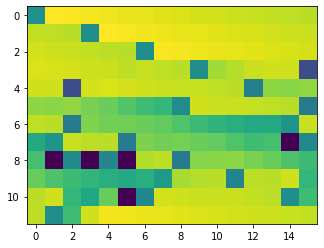

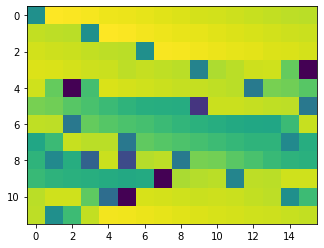

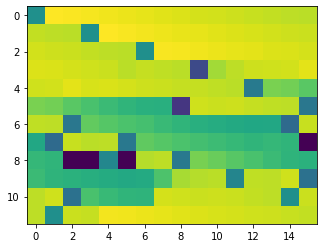

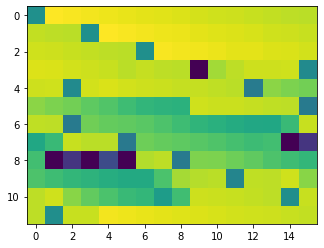

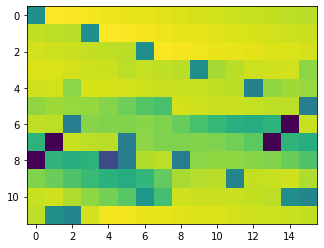

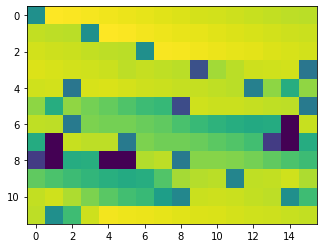

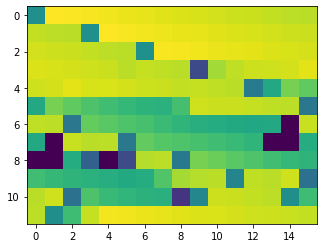

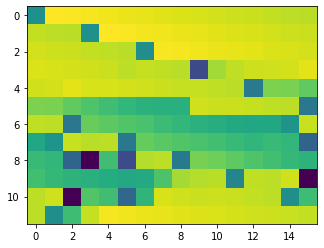

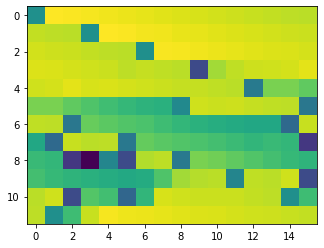

In [220]:
def getDepthCameraMap(features):
    mat = []
    for x in range(1,13):
        row = []
        for y in range(1,17):
            row.append(features['sensor_' + str((x-1) * 13 + y)])
        mat.append(row)
    return mat
plt.imshow(getDepthCameraMap(total_data['dc'].iloc[0]), interpolation='nearest')
plt.show()

subject_1_action_1 = total_data['dc'][total_data['dc']['subject'] == 2]
subject_1_action_1 = subject_1_action_1[subject_1_action_1['action'] == '2']

len(subject_1_action_1)
for i in range(0,10):
    index = i * 10 
    plt.imshow(getDepthCameraMap(subject_1_action_1.iloc[index]), interpolation='nearest')
    plt.show()

In [226]:
max(total_data['dc'].groupby(['subject','action']).count()['sensor_1'])

1169